### <div align="center">Spring 2024: Compututational and Variational Methods for Inverse Problems</div>
#### <div align="center"> Assignment-01: Ill-posedness and Regularization</div>
<div align="center">  <b>Shreshth Saini (SS223464)</b> </div>
<div align="center"><I> <a href="mailto:saini.2@utexas.edu">saini.2@utexas.edu</a> </I></div>



<div align="center">  Due February 14, 2024 </div>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### <div align="center"> Problem-1: 1D Heat Equation </div> 

#### Given: 

$$
\left\{
\begin{aligned}
\frac{\partial u}{\partial t} - k \frac{\partial^2 u}{\partial x^2} &= 0, & 0 < x < L,\ 0 < t < T \\
u(x, 0) &= m(x), & 0 < x < L \\
u(0, t) = u(L, t) &= 0, & 0 < t < T \tag{1.1}
\end{aligned}
\right.
$$

We are given the 1D heat equation with the initial condition $m(x)$ and boundary conditions $u(0, t) = u(L, t) = 0$. 
We are asked to show that the problem is ill-posed and then regularize it. Given the full observation of the solution at let's say some time $t = T$, we need to invert for the initial condition $m(x)$. In simple words, parameter-to-observable map $\mathcal{F}(m)$ is: 

$$
\mathcal{F}(m) := u(x, T) \tag{1.2}
$$

We can discretize the problem using 2nd order centered fininte differences in space (mesh size: $h = L/n_x$) and first order implicit Euler in time (Time step: $\Delta t = T/n_t$). Note that $m$ is $n_x - 1 $ vector representing the discretized field we wish to invert for, and $d$ is the corresponding data vector containing the observations for temperature at grid points. Now, ${(n_x -1)}\times{(n_x - 1)}$ matrix $F$, after discretization of parametere-to-obervable map $\mathcal F$, is given by:
$$F = (I + \Delta tK)^{-n_t} \tag{1.3}$$ 

where $K$ is the discretized diffusion operator of shape $(n_x -1)\times(n_x - 1)$. Also called as stiffness matrix:

$$ K = \frac{k}{h^2}
\begin{bmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \ddots & \vdots \\
0 & -1 & 2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -1 \\
0 & \cdots & 0 & -1 & 2
\end{bmatrix} \tag{1.4}
$$


#### **(a) Prove the Eigenvalues $\lambda_i$ and Eigenfunctions $\nu_i(x)$ of the continous operator $\mathcal F$:**

**To Prove:** 
$$\mathcal F(\nu_i) = \lambda_i \nu_i$$
$$OR$$
$$\lambda_i = e^{kT(\frac{\pi i}{L})^2},\space \space \nu_i(x)=\sqrt{\frac{2}{L}sin(\pi i\frac{x}{L})}, \space\space\space i = 1,2..... \tag {1.5}$$ 


**Proof:**

We can start by assuming the solution of temperature field is of the form $u(x, t) = \nu(x)T(t)$, where $\nu(x)$ is the eigenfunction and $T(t)$ is the eigenvalue. 
We can solve the PDE 1.1 using the separation of variables method.

$$u(x,t) = \nu(x)T(t) \tag{1.1a}$$

$$\implies \frac{\partial u}{\partial t} = \nu(x) \frac{\partial T(t)}{\partial t} \tag{1.2a}$$
$$\implies \frac{\partial^2 u}{\partial x^2} = \frac{\partial^2 \nu(x)}{\partial x^2} T(t) \tag{1.3a}$$

Substituting this into the 1D heat equation 1.1, we get:

$$\nu(x) \frac{\partial T(t)}{\partial t} - k \frac{\partial^2 \nu(x)}{\partial x^2} T(t) = 0 \tag{1.4a}$$

Rearraging the terms, we get:
$$\frac{1}{T(t)} \frac{\partial T(t)}{\partial t} - k \frac{1}{\nu(x)} \frac{\partial^2 \nu(x)}{\partial x^2} = 0\tag{1.5a}$$

Now, note that these two terms are functions of different variables. Hence, they must be equal to a negative constant. Let's call this constant as $-C$, $C>0$.

$$\frac{1}{kT(t)} \frac{\partial T(t)}{\partial t}= \frac{1}{\nu(x)} \frac{\partial^2 \nu(x)}{\partial x^2} = -C \tag{1.6a}$$

***Here, we have two ODEs. Let's solve them one by one:***

**1.** Solving the first ODE:
$$\frac{1}{kT(t)} \frac{\partial T(t)}{\partial t}= -C \tag{1.7a}$$

$$\implies \frac{1}{T(t)} \frac{\partial T(t)}{\partial t}= -kC \tag{1.8a}$$

$$\implies \frac{1}{T(t)} dT(t) = -kC dt \tag{1.9a}$$

Integrating both sides, we get:

$$\int \frac{1}{T(t)} dT(t) = -kC \int dt \tag{1.10a}$$

$$\implies ln(T(t)) = -kCt + C_1 \tag{1.11a}$$

$$\implies T(t) = e^{C_1}e^{-kCt} \tag{1.12a}$$

Let's call $e^{C_1}$ as $C_2$. Hence, we get:

$$T(t) = C_2e^{-kCt} \tag{1.13a}$$

**2.** Solving the second ODE:

$$\frac{1}{\nu(x)} \frac{\partial^2 \nu(x)}{\partial x^2} = -C \tag{1.14a}$$

$$\implies \frac{1}{\nu(x)} \frac{d^2 \nu(x)}{d x^2} = -C \tag{1.15a}$$

$$\implies \frac{d^2 \nu(x)}{d x^2} = -C\nu(x) \tag{1.16a}$$

This is a second order ODE. Let's assume the solution of this ODE is of the form $\nu(x) = e^{rx}$. Substituting this into the ODE, we get:

$$r^2e^{rx} = -Ce^{rx} \tag{1.17a}$$

$$\implies r^2 = -C \tag{1.18a}$$

$$\implies r = \pm i\sqrt{C} \tag{1.19a}$$

Hence, the general solution of the ODE is:


$$\nu(x) = B_1e^{i\sqrt{C}x} + B_2e^{-i\sqrt{C}x} \tag{1.21a}$$

Now, we can use the boundary conditions $u(0, t) = u(L, t) = 0$ to find the values of $B_1$ and $B_2$.

$$u(0, t) = 0 \implies \nu(0)T(t) = 0 \implies \nu(0) = 0 \tag{1.22a}$$

$$u(L, t) = 0 \implies \nu(L)T(t) = 0 \implies \nu(L) = 0 \tag{1.23a}$$

Substituting $\nu(x) = B_1e^{i\sqrt{C}x} + B_2e^{-i\sqrt{C}x}$ into the boundary conditions, we get:

$$\nu(0) = B_1 + B_2 = 0 \tag{1.24a}$$

$$\nu(L) = B_1e^{i\sqrt{C}L} + B_2e^{-i\sqrt{C}L} = 0 \tag{1.25a}$$

From equation 1.24a, we get:

$$B_1 = -B_2 \tag{1.26a}$$

Substituting this into equation 1.25a, we get:

$$B_1e^{i\sqrt{C}L} - B_1e^{-i\sqrt{C}L} = 0 \tag{1.27a}$$

$$\implies B_1(e^{i\sqrt{C}L} - e^{-i\sqrt{C}L}) = 0 \tag{1.28a}$$

$$\implies B_1(2i\sqrt{C}sin(\sqrt{C}L)) = 0 \tag{1.29a}$$

$$\implies B_1 = 0 \space or \space sin(\sqrt{C}L) = 0 \tag{1.30a}$$

$$\implies B_1 = 0 \space or \space \sqrt{C}L = n\pi \tag{1.31a}$$

Here, n is the number of modes. 

$$\implies B_1 = 0 \space or \space \sqrt{C} = \frac{n\pi}{L} \tag{1.32a}$$

$$\implies B_1 = 0 \space or \space C = \frac{n^2\pi^2}{L^2} \tag{1.33a}$$

Therefore, the $T(t)$ with the value of $C$ are given by:

$$T(t) = (C_2)_iexp({-(\frac{\pi i}{L})^2 kt}) \tag{1.34a}$$
Let's call $(C_2)_i$ as $A^{\dagger}_i$, so above equation becomes:
$$T(t) = A^{\dagger}_iexp({-\big(\frac{\pi i}{L})^2 kt}) \tag{1.34a}$$

And, $\nu(x)$ expression with $C$ and writing in terms of sin and cos is given by:

$$\nu_i(x) = B_1e^{i\sqrt{C}x} + B_2e^{-i\sqrt{C}x} \tag{1.35a}$$

$$\nu_i(x) = B_1cos(\sqrt{C}x) -B_1isin(\sqrt{C}x) + B_2cos(\sqrt{C}x) + B_2isin(\sqrt{C}x) \tag{1.36a}$$

$\because$ $B_1 = -B_2$, we get:

$$\nu_i(x) = A^{\ddagger}_i sin(\frac{\pi i x}{L}) \tag{1.37a}$$

***Finally, the general solution is:***

$$u(x,t) = \sum_{i=1}^{\infty} A^{\dagger}_iA^{\ddagger}_iexp({-\big(\frac{\pi i}{L})^2 kt})sin(\frac{\pi i x}{L}) \tag{1.38a}$$

**Now, let use the initial condition $u(x, 0) = m(x)$ to find the values of $A^{\dagger}_i \times A^{\ddagger}_i$:**

$$u(x, 0) = \sum_{i=1}^{\infty} A^{\dagger}_iA^{\ddagger}_isin(\frac{\pi i x}{L}) = m(x) \tag{1.39a}$$

For each mode $i$ above equation holds: 

$$\implies A_i^{\dagger}A_i^{\ddagger}sin(\frac{\pi i x}{L}) = m(x) \tag{1.40a}$$

Using the initial condition it becomes: 

$$ u(x,0) = m(x) = A^{\dagger}_iA^{\ddagger}_isin(\frac{\pi i x}{L}) \tag{1.41a}$$

$$\implies A^{\dagger}_iA^{\ddagger}_i sin(\frac{\pi i x}{L}) = \sqrt{\frac{2}{L}}sin(\frac{\pi i x}{L}) \tag{1.42a}$$

**Therefore, our particular solution takes the following form:**

$$u(x,t) = \sum_{i=1}^{\infty} \sqrt{\frac{2}{L}}exp({-\big(\frac{\pi i}{L})^2 kt})sin(\frac{\pi i x}{L}) \tag{1.43a}$$

**Hence, the parametere-to-obervable map equation 1.2 takes the form for each model i :**

$$\mathcal F(\nu_i) = \lambda_i \nu_i$$

$$ = u_i(x,T)$$

$$ = \sqrt{\frac{2}{L}}exp({-\big(\frac{\pi i}{L})^2 kT})sin(\frac{\pi i x}{L}) \tag{1.44a}$$

Thus, the above equation gives us the eigenfunction $\nu(i)$ and eigenvalues $\lambda(T)$ for the parameter to obervable $\mathcal F$ are: 

$$\lambda_i = e^{-kT(\frac{\pi i}{L})^2},\space \space \nu_i(x)=\sqrt{\frac{2}{L}}sin(\pi i\frac{x}{L}), \space\space\space i = 1,2..... \tag {1.45a}$$

Hence, we have proved the eigenvalues and eigenfunctions of the continous operator $\mathcal F$.







#### **(b) Derive the Expressions for Eigenvalues $\mu_i$ and Eigenvectors $[\mu_i]_j$ for discrete parametere-to-obervable operator $F$:**

**Given:** 
The eigevalues $\mu_i$ of stiffness matrix $K$ are given by: 

$$\mu_i = k\frac{4}{h^2}sin^2(\frac{\pi i}{2n_x}), \space\space\space i = 1,2,3....n_x-1 \tag{1.1b}$$

and the eigenvectors $[u_i]_j$ of stiffness matrix $K$ are given by:

$$[u_i]_j = \sqrt{\frac{2}{L}}sin(\pi i\frac{jh}{L}), \space\space\space i = 1,2,3....n_x-1, \space\space j = 1,2,3....n_x-1 \tag{1.2b}$$


**Solutions:**

We know from equation 1.4 that matrix $K$ is symmetric and positive definite. Hence, it has real eigenvalues and orthogonal eigenvectors. 

Thus the eigen value decomposition of $K$ is given by: 

$$K = U \space M \space U^T \tag{1.3b}$$

where $U$ is the matrix of eigenvectors and $M$ is the diagonal matrix of eigenvalues.

Lets use discrete form of $F$ frin equaton 1.3 , $$I+\Delta tK = I + \Delta t(U \space M \space U^T) \tag{1.4b}$$

$$\because U U^T = I $$

$$\ = U U^T + U \space \Delta tM \space U^T  \tag{1.5b}$$

$$\ = U (I + \Delta tM) U^T  \tag{1.6b}$$

Lets put use the above equation in equation 1.3, we get: 

$$F = (I + \Delta tK)^{-n_t} = (U (I + \Delta tM) U^T)^{-n_t} \tag{1.7b}$$

$$\ = U (I + \Delta tM)^{-n_t} U^T  \tag{1.8b}$$

***Now, since we know the eigenvalues and eigenvectors of $K$:***

$$M = diag[\mu_1, \mu_2, \mu_3,....\mu_{n_x-1}], \space \space \space U = [u_1, u_2, u_3,....u_{n_x-1}] \tag{1.9b}$$

Thus,  the eigenvalues and eigenvectors of discrete parameter to observable operator $F$ are given by:

$$\lambda_{F,i} = (1 + \Delta t \mu_i)^{-n_t}, \space \space \space [\nu_{F,i}]_j = [u_i]_j = \sqrt{\frac{2}{L}}sin(\pi i\frac{jh}{L}), \space\space\space i = 1,2,3....n_x-1, \space\space j = 1,2,3....n_x-1 \tag{1.10b}$$






#### **(c) PLot of Decay of Eigenvalues of the continous parameter-to-observable operator $\mathcal F$:**
We set the $T=1$, $L=1$, and take $n_x=n_t=100$. We plot the decay of eigenvalues for following values of $k=[0.0001, 0.001,0.01,0.1]$ with i(modes). 

**Explaination:**
Results are shown in Figure-1 as outout plot from cell below. 
As discussed in the class and oberserved in the plot, that the decay of eigen values is much faster for higher diffusivity $k$. This is because the higher diffusivity $k$ leads to faster decay of the temperature field/information loss. Furthermore, the small values of $k$ leads to slower decay and loss of information is less for high frequency modes. 





#### **(d) PLot of Decay of Eigenvalues of the discrete parameter-to-observable operator $F$:**
We set the $T=1$, $L=1$, and $k=0.01$. We plot the decay of eigenvalues of $F$ as function of i for different space and time discretizations and compare with exact eigenvalu spectrum. $(n_x, n_t) = (20,20),(40,40),(80,80),(160,160)$

**Explaination:**
Results are shown in Figure-2 as outout plot from cell below. 

As we increase the resolution, the continous curve is traversed even further. The spectrums are truncted to the largest mode $i =n_x -1$ having the smallest eigenvalue for the corresponding choice of $(n_x,n_t)$. The discrete eigenvalues are mostly higher than the continous eigenvalues. This is more prevalent for coarse discretization. For big values of i, the discrete eigenvalues deviate significantly. It is safe to say that discretization introduces a regularization like effect. 



In [ ]:
# Install the necessary packages 

# try loading hiPPylib if it fails install it 
try:
    import hiPPylib
except ImportError:
    !pip install --upgrade --user matplotlib 
    !pip install --upgrade --user numpy
    !pip install --upgrade --user pandas
    !pip install --upgrade --user scikit-learn
    !pip install --upgrade --user scipy 
    !pip install --upgrade --user FEniCS 
    !pip install --upgrade --user hiPPylib 



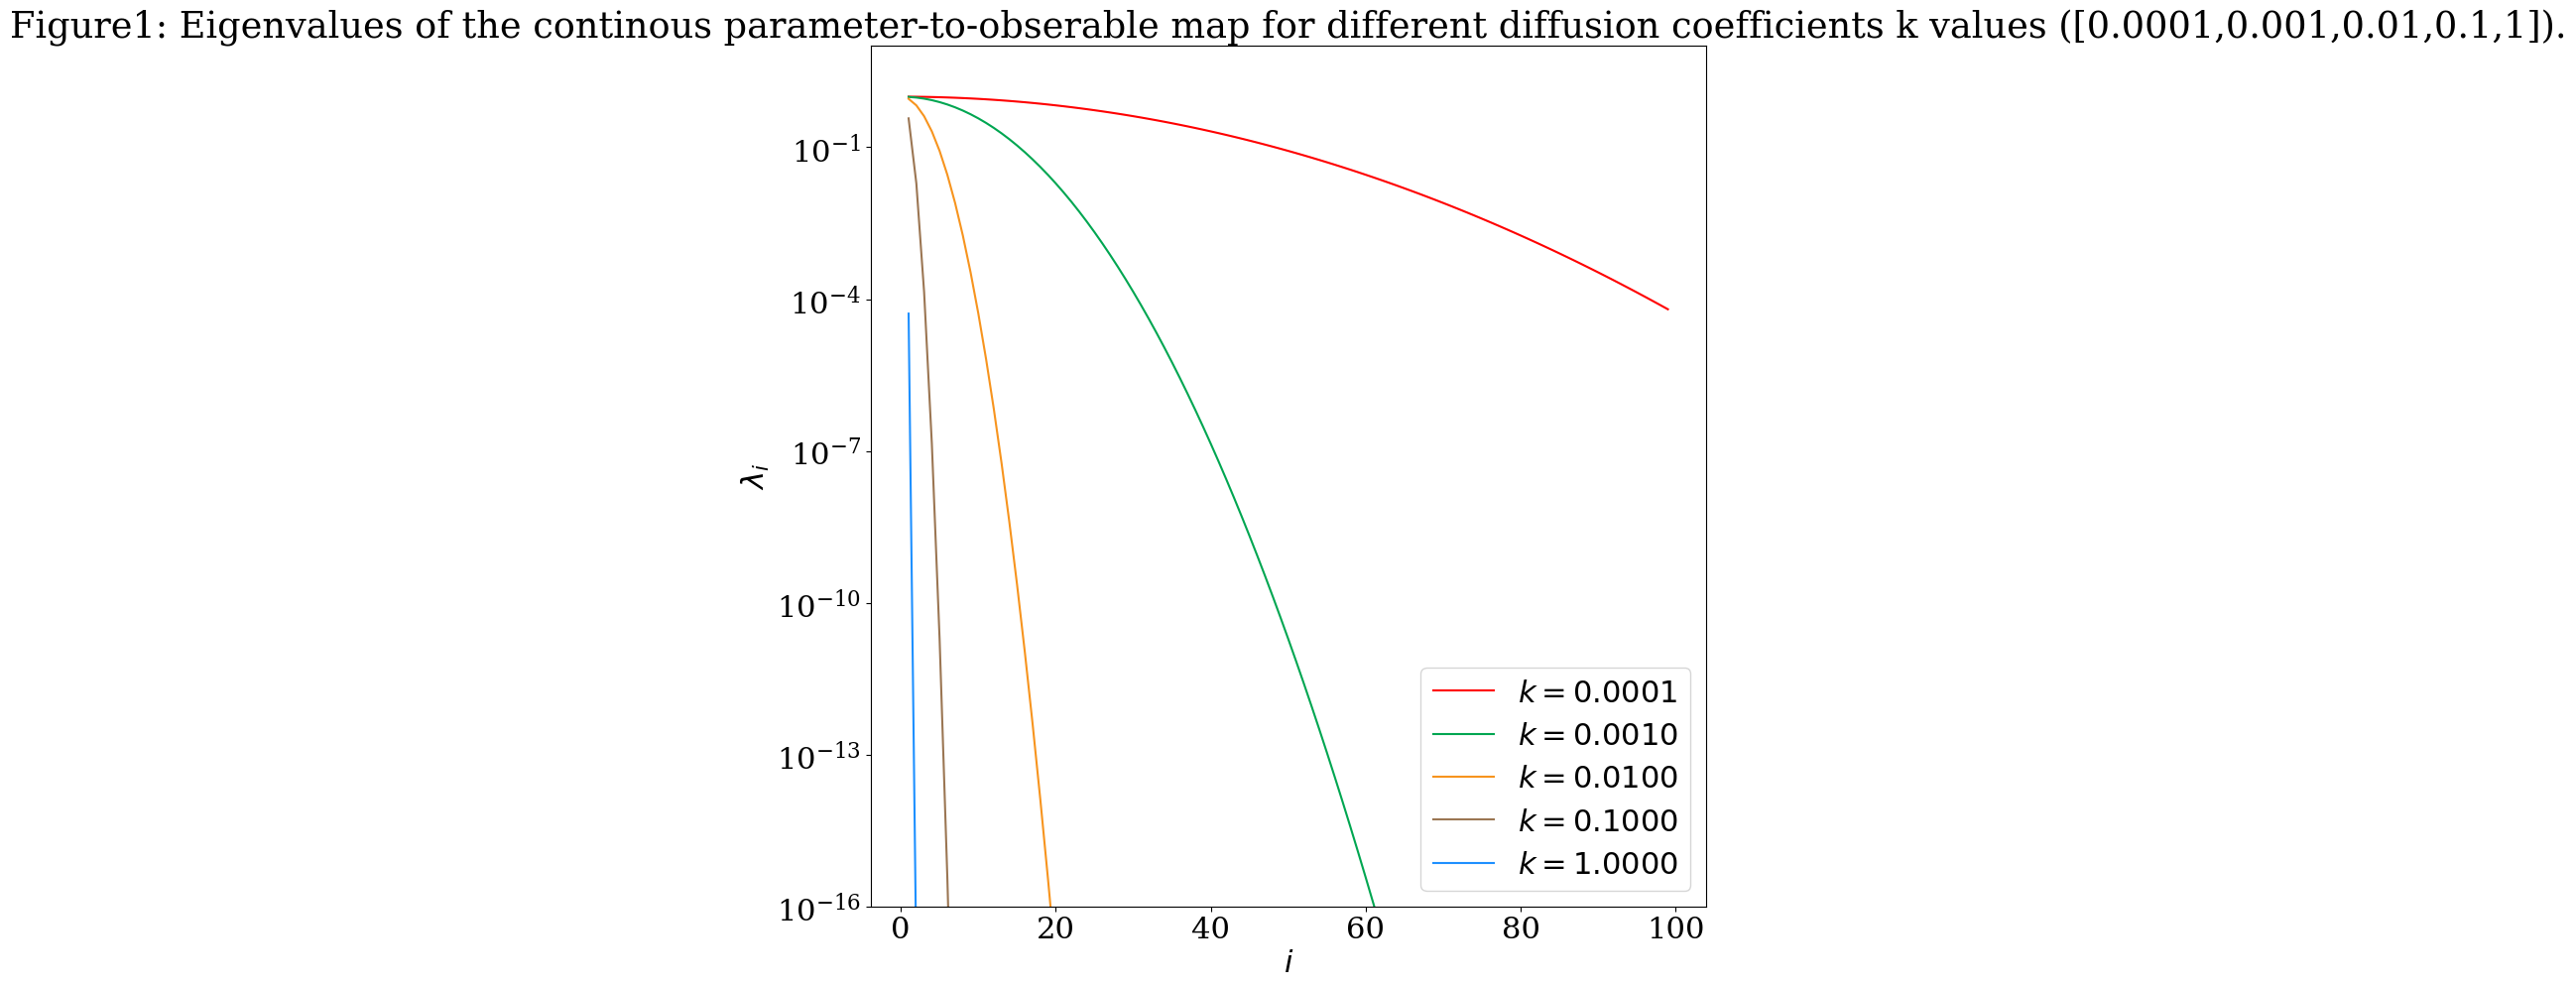

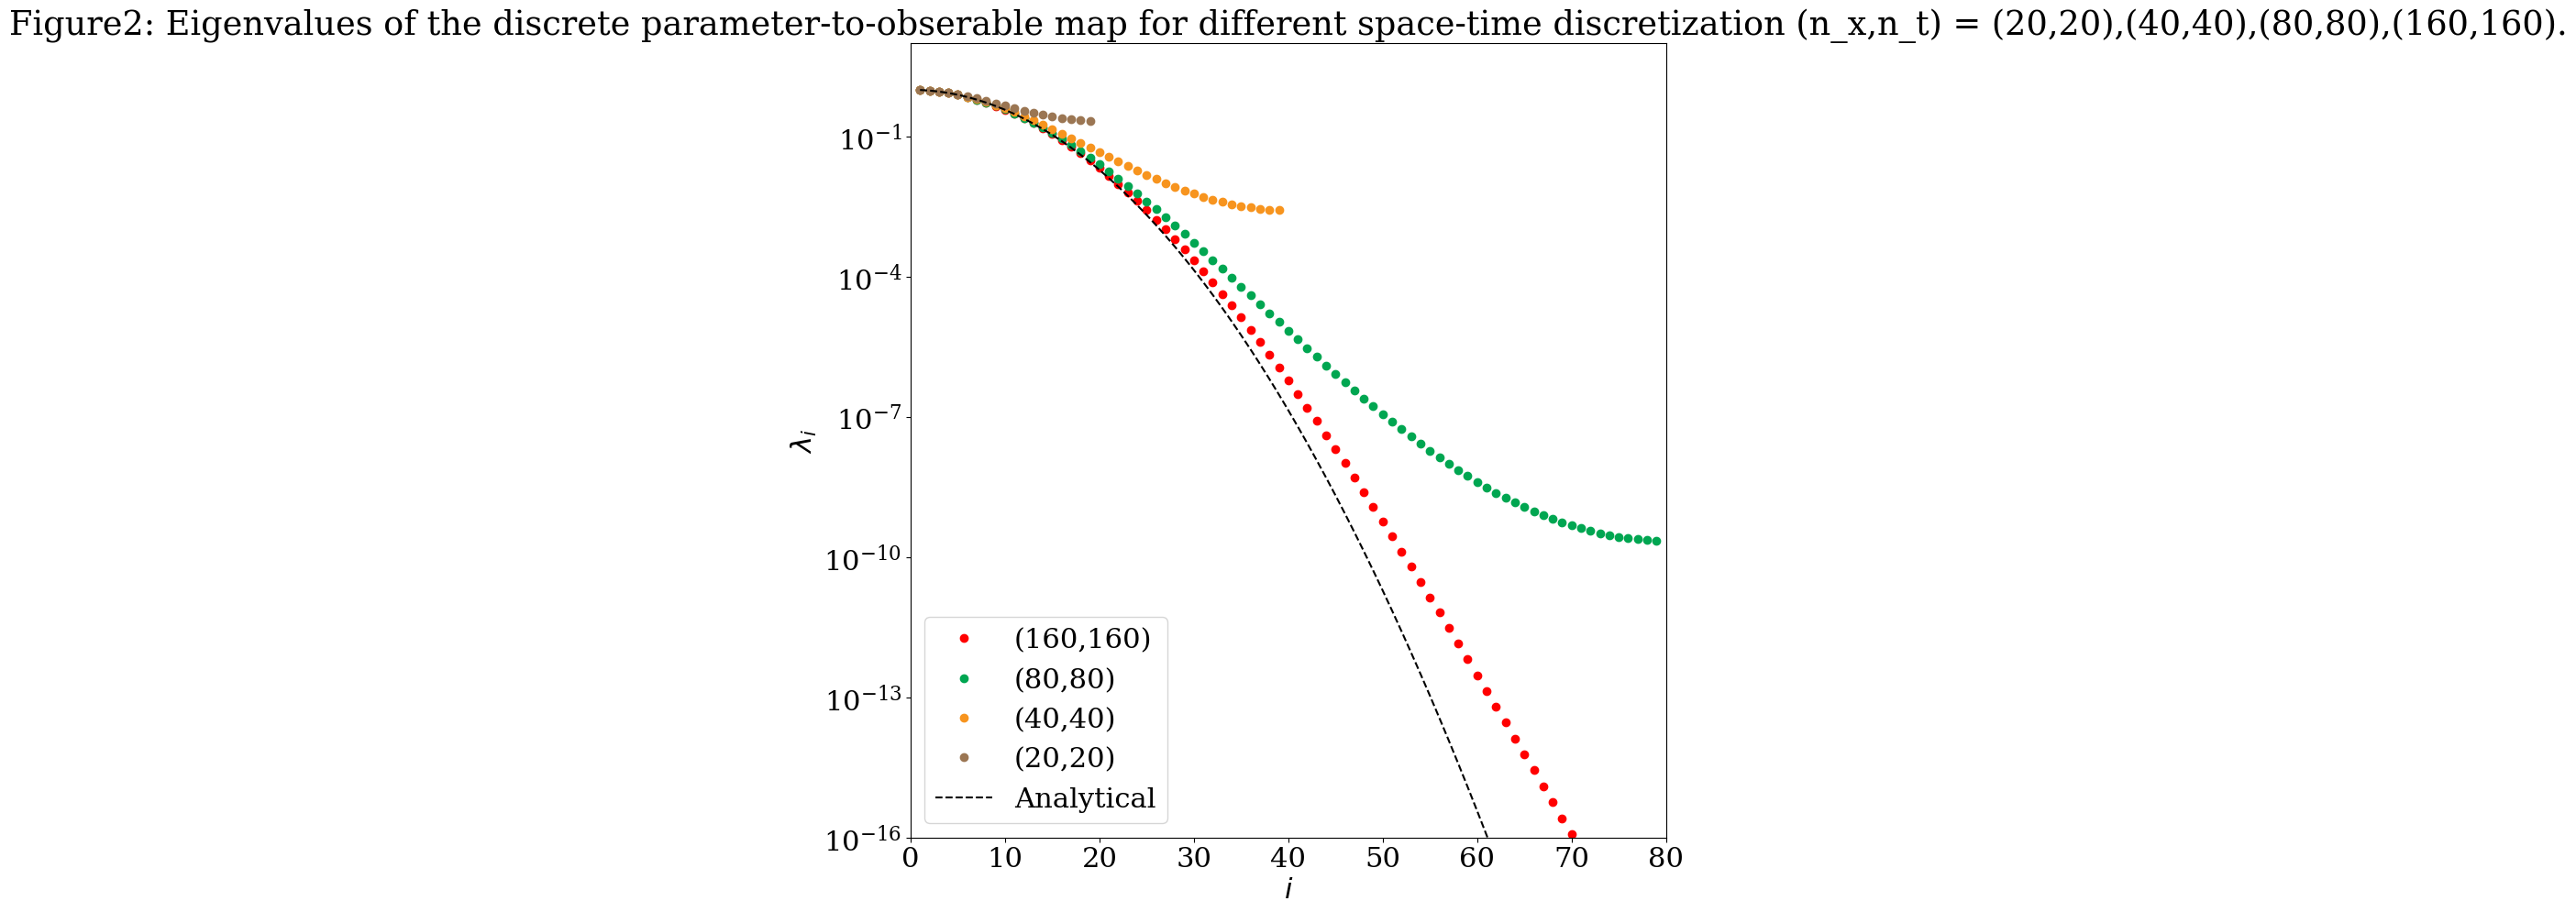

In [16]:
"""
Computational and Variational Methods for Inverse Problems (Spring 2024)
Assignment-01 -- Question-1 (c-d)

---> Code for Generating the plots for eigenvalues decay of the continuous and discrete operators with respect to i varying with k and space-time discretization.

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 7th February 2024
"""

# Question 1(C-D)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import numpy as np
# supress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

class eigen_decay():
    def __init__(self):
        #eigen values 
        self.eigen_cont, self.eigen_disc = self.define_eigen_vs()
        #colors 
        self.color_array = self.colors()
        
    def define_eigen_vs(self):
        # eigen value of continuous operator
        eigen_cont = lambda k,T,L,i: np.exp(-k*T*(np.pi/L)**2*i**2) 
        # eigen value of discrete operator 
        eigen_disc = lambda dt,k,h,i,nx,nt: (1 + dt*k*4/h**2*(np.sin(np.pi*i/(2*nx)))**2)**(-nt) 
        return eigen_cont, eigen_disc
        
    def decay_conti(self, f_time=1, leng=1, n_x=100, n_t=100):
        ## Defining Parameters
        # Final time
        T = f_time 
        # Length of the domain [0,1]
        L = leng 
        # Number of cellls in x
        nx= n_x
        # Number of cells in time
        nt= n_t

        # Modes
        i = np.linspace(1,nx - 1,nx - 1) 
        k_array = np.logspace(-4,0,5)
                
        plt.figure(figsize=(10,10))
        for count, k in enumerate(k_array):
            plot = plt.semilogy(i,self.eigen_cont(k,T,L,i),c=self.color_array[count],label=r'$k=%0.4f$'%k)

        plt.legend(loc='best')
        plt.ylim([1e-16,10])
        plt.xlabel(r'$i$')
        plt.ylabel(r'$\lambda_i$')
        # add title at bottom of the image         
        plt.title("Figure1: Eigenvalues of the continous parameter-to-obserable map for different diffusion coefficients k values ([0.0001,0.001,0.01,0.1,1]).")


        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.savefig(f"1C_conti_eigen_k.png")

    def decay_discrete(self, nx_nt, f_time=0.1, leng=1, k_=0.01):
        ## Defining Parameters
        ## Defining Parameters
        # Final time
        T = f_time 
        # Length of the domain [0,1]
        L = leng 
        # Diffusion coefficient 
        k = k_

        # space-time discretization
        nxnt = nx_nt

        plt.figure(figsize=(10,10))
        for count, nx in enumerate(nxnt):
            i = np.linspace(1,nx- 1,nx - 1) #Modes
            nt = nx
            h = L/nx #Cell sixe
            dt= T/nt #Time step
            plot = plt.semilogy(i,self.eigen_disc(dt,k,h,i,nx,nt),'ro',c=self.color_array[count],label=f'({nx},{nt})')

        i = np.linspace(1,160 - 1,160 - 1) #Modes

                
        plot = plt.semilogy(i,self.eigen_cont(k,T,L,i),'k--',label=f'Analytical')

        plt.legend(loc='lower left')
        plt.xlabel(r'$i$')
        plt.xlim([0,80])
        plt.ylim([1e-16,10])
        plt.ylabel(r'$\lambda_i$')
        # caption the plot 
        plt.title("Figure2: Eigenvalues of the discrete parameter-to-obserable map for different space-time discretization (n_x,n_t) = (20,20),(40,40),(80,80),(160,160).")

        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.savefig(f"1D_discrete_eigen_discretization.png")
        

    def plots(self, save_name, legendloc='best'):
        plt.legend(loc=legendloc)
        plt.xlabel(r'$i$')
        plt.xlim([0,80])
        plt.ylim([1e-16,10])
        plt.ylabel(r'$\lambda_i$')

        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.show()
        plt.savefig(save_name)
        
    def colors(self):
        #Colors
        brown  = [181/255 , 101/255, 29/255]
        red    = [255/255 ,0/255 ,0/255 ]
        blue   = [ 30/255 ,144/255 , 255/255 ]
        green  = [  0/255 , 166/255 ,  81/255]
        orange = [247/255 , 148/255 ,  30/255]
        purple = [102/255 ,  45/255 , 145/255]
        brown  = [155/255 ,  118/255 ,  83/255]
        tan    = [199/255 , 178/255 , 153/255]
        gray   = [100/255 , 100/255 , 100/255]

        color_array = [red,green,orange,brown,blue,purple, tan, gray]
        
        return color_array



if __name__ == "__main__":
    
    # Initialize the class
    eigen = eigen_decay()
    # Plot the eigenvalues decay of the continuous operator
    eigen.decay_conti(f_time=1, leng=1)
    # Plot the eigenvalues decay of the discrete operator
    eigen.decay_discrete([160,80,40,20], f_time=0.1, leng=1, k_=0.01)
    # Plot the eigenvalues decay of the continuous and discrete operator
    

#### <div align="center"> Problem-2: Inverse Problem for Poisson's Equations</div> 
Exploring the ill-posedness and regularization of the inverse problem for Poisson's equation using axial deformation of an elastic rod of length $L$. Here, the inverse problem is to infer the distributed body force(per unit length) $m(x)$, from the observations of the axial displacement $u(x)$ everywhere along the length of the rod. 

#### Given: 
Given $m(x)$, we can find $u(x)$ by solving the Poisson's equation that is a elliptic PDE for axia displacement $u(x)$:

$$
\left\{
\begin{aligned}
-k\frac{\partial^2 u}{\partial x^2} &= m(x), 0 < x < L \\
u(0) &= u(L) = 0 \tag{2.1}
\end{aligned}
\right.
$$

Here, $k$ is the elastic modulus of the rod and rod is fixed. Therefore, parameter-to-observable map $\mathcal F(m)$ is given as:

$$\mathcal F(m) := u(x) \tag{2.2}$$

For simplification, let $-k\frac{\partial^2 }{\partial x^2}$ be $\mathcal L$: 

$$
\left\{
\begin{aligned}
\mathcal L u &= m(x), 0 < x < L \\
u(0) &= u(L) = 0 
\end{aligned} \tag{2.3}
\right.
$$

Therefore, 

$$u(x) = \mathcal L^{-1}m(x) \tag{2.4}$$

$$\implies \mathcal F(m) = \mathcal L^{-1}m(x) \tag{2.5}$$

Thus, $$ \mathcal L^{-1} = \mathcal F \tag{2.6}$$



#### **(a) Eigenvalues $\lambda_i$ and Eigenfunctions $\nu_i(x)$ for $mathcal F$:**

Given that the eigenfuncations $mu_i(x)$ of operator $mathcal L$ are same as the eigenfunctions of the continous operator $\mathcal F$ for the 1D heat equation.

i.e. $$\mathcal mu_i = \sqrt{2}{L} sin(i\pi\frac{x}{L}), \space\space\space i = 1,2,3.... \tag{2.1a}$$

$$\mathcal L \nu_i = -k\frac{\partial^2 \nu_i}{\partial x^2} \tag{2.2a}$$

now putting equation 2.1a into 2.2a, we get:

$$\mathcal L \nu_i = -k\frac{\partial^2 \sqrt{\frac{2}{L}} sin(i\pi\frac{x}{L})}{\partial x^2} \tag{2.3a}$$

$$\mathcal L \nu_i = -k\frac{\pi^2i^2}{L^2} \sqrt{\frac{2}{L}} sin(i\pi\frac{x}{L}) \tag{2.4a}$$

$$\mathcal L \nu_i = -k(\frac{\pi i}{L})^2 \nu_i \tag{2.5a}$$

It takes the form of eigenvalue equation $\mathcal F(\nu_i) = \mu_i \nu_i$ with $\mu_i = -k(\frac{\pi i}{L})^2$ and $\nu_i(x) = \sqrt{\frac{2}{L}} sin(i\pi\frac{x}{L})$.

From equation 2.6, the eigenvalues are: 

$$\lambda_i = \frac{1}{mu_i} = \frac{1}{-k(\frac{\pi i}{L})^2} = -\frac{L^2}{k\pi^2i^2}, \space\space\space i = 1,2,3.... \tag{2.6a}$$



#### **(b) Eigenvalues of Discrete $F$ v/s Continous $mathcal F$:**

**Given:**
Discretizing the scaled laplacian $-ku_{xx}$ PDE using second order centeral differencing in space, gives us the stiffness matrix $K$ as previously defined in equation 1.4.

Equation: 

$$Ku = m \tag{2.1b}$$

$$\implies u = K^{-1}m \tag{2.2b}$$ 

$$\implies F(m) = K^{-1}m \tag{2.3b}$$

i.e. $F = K^{-1}$

**Solution :**
Since, we know the eigenvalues($\mu_i$) and eigenvectors($[u_i]_j$) of $K$ from 1.1b and 1.2b, we can use the same to find the eigenvalues and eigenvectors of $F$, same eigenvectors with eigenvalues that are inverse of eigenvalues of $K$.

$$\lambda_{F,i} = \frac{1}{\mu_i} = \frac{1}{k\frac{4}{h^2}sin^2(\frac{\pi i}{2n_x})}, \space\space\space i = 1,2,3....n_x-1 \tag{2.4b}$$

$$ [\nu_{F,i}]_j = [u_i]_j = \sqrt{\frac{2}{L}}sin(\pi i\frac{jh}{L}), \space\space\space i = 1,2,3....n_x-1, \space\space j = 1,2,3....n_x-1 \tag{2.5b}$$

**Figure-3** shows the eigenvalue spectrum against modes $i$, we keep the $k=L=1$ & $n_x=100$ as indicated in the problem description. For both continous and discrete operators, eigenvalues decay rapidly. We can observe from the plot that till ~$i=30$, the eigenvalues are almost same for both continous and discrete operators. After that, the continous eigenvalues decay faster than the discrete eigenvalues. This is more prevalent for coarse discretization. For big values of i, the discrete eigenvalues deviate significantly, that is because eigenvalues decay at $i^{-2}$ for the poisson problem whereas $exp(i^{-2})$ for heat equation. Indicating that the Poisson is less ill-posed than the heat equation.


#### **(C) :**

**Given:**


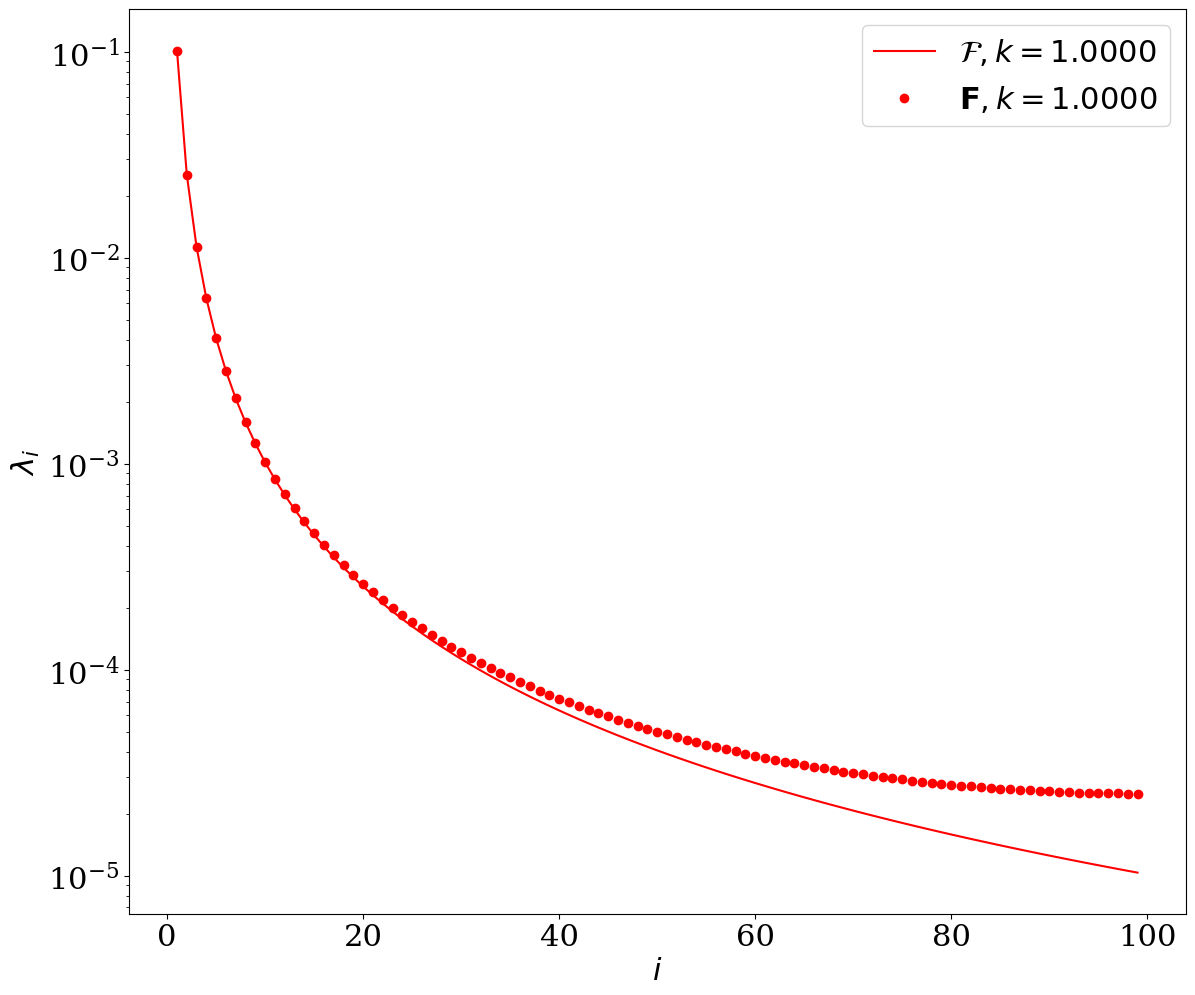

In [17]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm         #color map
plt.rcParams.update({'font.family': "Serif"})
plt.rcParams.update({'font.size': 22})


eigen_cont = lambda k,L,i: 1/(k*(i*np.pi/L)**2) #eigen value of continuous operator
eigen_disc = lambda k,h,i,nx: 1/(k*4/h**2*(np.sin(np.pi*i/(2*nx)))**2) #eigen value of discrete operator

#Colors
brown  = [181/255 , 101/255, 29/255]
red    = [255/255 ,0/255 ,0/255 ]
blue   = [ 30/255 ,144/255 , 255/255 ]
green  = [  0/255 , 166/255 ,  81/255]
orange = [247/255 , 148/255 ,  30/255]
purple = [102/255 ,  45/255 , 145/255]
brown  = [155/255 ,  118/255 ,  83/255]
tan    = [199/255 , 178/255 , 153/255]
gray   = [100/255 , 100/255 , 100/255]

color_array = [red,green,orange,brown,blue,purple]


#PART (b)
#Parameters
L = 1 #Length of the domain [0,1]
nx= 100#Number of cellls in x

i = np.linspace(1,nx - 1,nx - 1) #Modes
h = L/nx #Cell sixe
k_array = [1]


plt.figure(figsize=(5,5))
for count, k in enumerate(k_array):
    plot = plt.semilogy(i,eigen_cont(k,L,i),c=color_array[count],label=r'$\mathcal{F}, k=%0.4f$'%k)
    plot = plt.semilogy(i,eigen_disc(k,h,i,nx),'ro',c=color_array[count],label=r'$ {\bf{F}}, k=%0.4f$'%k)

plt.legend(loc='best')
plt.xlabel(r'$i$')
plt.ylabel(r'$\lambda_i$')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(f"2b_discvscont_evals.png")